# Baseline: K neareast neighbors classifier on metadata

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/neku5162/anaconda3/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
metadata = pd.read_csv('data/training_set_metadata.csv').fillna(0) # import df and replace NaN's w/ zero. 
metadata = metadata.sample(frac=1) # randomly shuffle dataframe

In [5]:
from collections import Counter

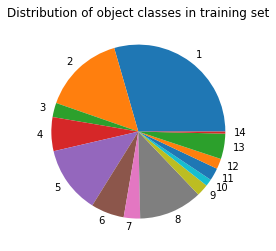

In [51]:
plt.title("Distribution of object classes in training set")

plt.pie(Counter(metadata.target).values(),labels=labels)
plt.savefig('metadata_pie.png')
plt.show()


We can see how unequal the distribution of classes in the training set is

In [10]:
# Make training - validation/test split
X_train = metadata.iloc[:7000,0:11].values
y_train = metadata.iloc[:7000,11].values

X_test = metadata.iloc[7000:,0:11].values
y_test = metadata.iloc[7000:,11].values

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss

def get_accuracy(N):
    neigh = KNeighborsClassifier(n_neighbors=N)
    neigh.fit(X_train, y_train) 
    preds = neigh.predict(X_test)
    correct = np.sum((preds == y_test)*1.0)
    
    classes = np.sort(np.unique(preds))
    transformed = []
    for i in range(len(preds)):
        probabilities = (preds[i] == classes)*1.0
        probabilities = np.pad(probabilities, (0, 14 - len(classes)), 'constant')
        transformed.append(probabilities)

    logloss = log_loss(y_test, np.array(transformed))
    return [correct/len(preds),log_loss(y_test, np.array(transformed))]

    

/Users/neku5162/anaconda3/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
logspace = np.logspace(0,np.log10(200))
logspace = np.unique([int(i) for i in logspace])

In [8]:
logspace

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,  14,
        16,  18,  20,  23,  25,  28,  31,  35,  39,  44,  49,  54,  60,
        67,  75,  84,  93, 104, 116, 129, 144, 161, 179, 200])

In [85]:
accuracy_list = np.array([get_accuracy(i) for i in logspace])

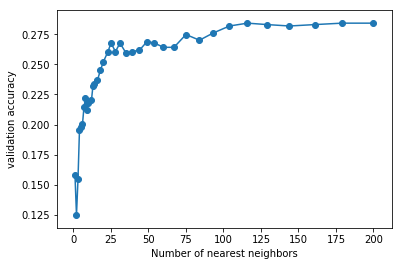

In [117]:
plt.plot(logspace,accuracy_list[:,0])
plt.scatter(logspace,accuracy_list[:,0])
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Validation accuracy')
plt.show()

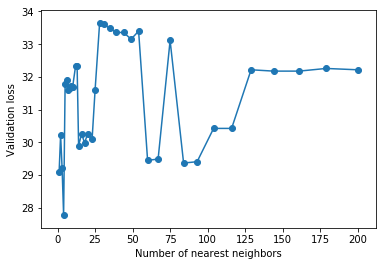

In [120]:
plt.plot(logspace,accuracy_list[:,1])
plt.scatter(logspace,accuracy_list[:,1])
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Validation loss')
plt.show()


In [14]:
#impliment KNN classifier with 1 nearest neighbor. Cheap and easy
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train) 
preds = neigh.predict(X_test)


In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sn


/Users/neku5162/anaconda3/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Text(0.5, 69.0, 'True Label')

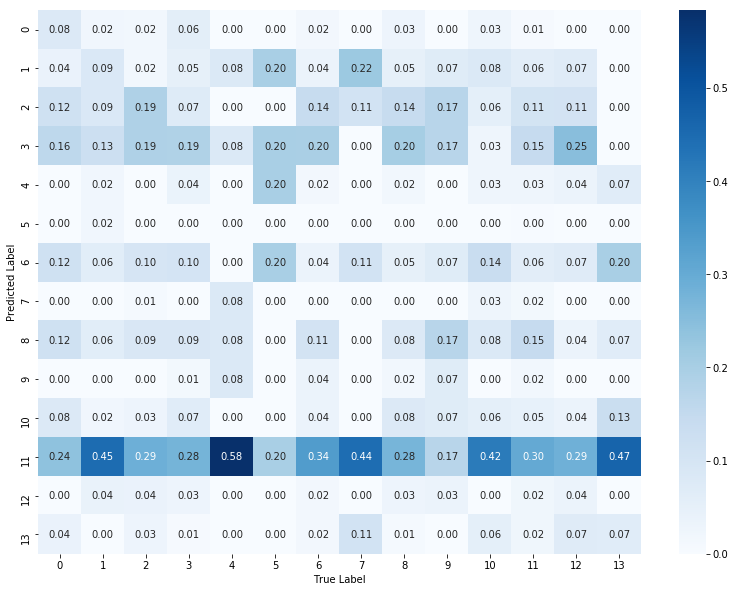

In [26]:
cm = confusion_matrix(preds,y_test)
cm_norm = cm/cm.sum(axis=0)
plt.figure(figsize = (13.5,10))
sn.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues')
plt.ylabel('Predicted Label')
plt.xlabel('True Label')




It seems like the KNN is just predicting the most commonly occuring class. In KNN, it's seems like we're optimizing for accuracy not necessarily log loss. Hence under-respsented classes are poorly predicted